# Лабораторная работа: обучение многообразий

# PCA

В этом блоке вам предстоит выполнить задания, касающиеся метода главных компонент (`PCA`).

## Теоретическая часть

Пусть на вход подаются центрированные данные
$$
x_i = \begin{pmatrix}
x_{i1} \\ x_{i2} \\ \vdots \\ x_{ip}
\end{pmatrix} \in \mathbb R^{p \times 1}, \quad i \in \{1, \ldots, n\}, \quad \sum\limits_{i = 1}^n x_i = 0.
$$
Пусть также $X$ — матрица размера $n \times p$ — матрица объекты-признаки (внимание: объекты расположены в матрице $X$ по строкам), $W$ – матрица размера $p \times l$ из ортонормированных базисных векторов (их координаты записаны по столбцам) линейного подпространства $\mathbb R^l$ пространства $\mathbb R^p$, в которое мы хотим «вложить» исходные объекты, $Z$ — матрица размера $n \times l$ — матрица координат старых объектов в новом базисе. Мы определили функцию потерь ($l_2$-потери) следующим образом:

$$
L(W) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2.
$$

На лекции мы обсудили построение первой главной компоненты, минимизируя выражение

$$
L(W) = \sum\limits_{i = 1}^n\|x_i - w_1z_{i1}\|^2.
$$

При условии, что $w_1^Tw_1 = 1$, мы получили, что

$$
z_{i1} = x_i^Tw_1,
$$

то есть что новая координата есть проекция на $w_1$, и что $w_1$ — собственный вектор выборочной ковариационной матрицы

$$
\Sigma = \frac{1}{n}X^TX,
$$

отвечающей наибольшему собственному значению.



## Задача 1

Вам требуется построить первые две главные компоненты, объяснить сособ их получения, а также их геометрический и статистический смыслы. Для этого:

1.   Составьте минимизируемый функционал.
2.   Докажите, что новые координаты (счеты) — это проекции исходных данных на соотвествующие векторы $w_1$, $w_2$.
3. Докажите, что $w_1$, $w_2$ — это собственные векторы выборочной ковариационной матрицы, отвечающие двум наибольшим собственным значениям, по убыванию, соответственно.
4. Покажите, что статистический смысл упомянутых выше собственных чисел — значение выборочных дисперсий соответствующих (новых) координат.

### Решение:


#### (1) Минимизируемый функционал

В наших обозначениях: 

$W = [\,w_1 \; w_2\,] \in \mathbb{R}^{p \times 2}$; для каждого $i$:  $z_i = \begin{pmatrix} z_{i1} \\ z_{i2} \end{pmatrix} \in \mathbb{R}^{2 \times 1}$ откуда $$\hat{x}_i = w_1 z_{i1} + w_2 z_{i2} =  W z_i$$

При этом $w_1^T w_1 = 1, w_2^T w_2 = 1, w_1^T w_2 = 0 \implies W^T W = E_2$ (матричная единица 2 на 2). Тогда минимизируемый функционал можно представить в виде $$L(W, Z) = \|X^T - WZ^T\|^2_F = \sum\limits_{i = 1}^n \|x_i - Wz_i\|^2 = \sum\limits_{i = 1}^n  \|x_i - w_1 z_{i1} - w_2 z_{i2}\|^2$$ 

Итого минимизируем $\min_{W, Z} L(W, Z)$ при условии $W^TW = E_2$

#### (2) Показать, что новые координаты -- проекции 

Минимизируем $\min_{Z} L(Z)$ при условии $W^TW = E_2$ и фиксированном $W$. Тогда мы можем решать $\min_{z_i} \| x_i - Wz_i\|^2$ для каждого $i$. 

Рассмотрим отдельный $i$. Для него минимизируем $f_i(z_i) = \| x_i - Wz_i\|^2 = (x_i - W z_i )^T (x_i - W z_i )$. Условие первого порядка: $$\nabla_z f_i(z_i) = -2W^Tx_i + 2W^tWz_i = 0$$ откуда $$W_T x_i = W^T W z_i$$ И из $W^T W = E_2$: $$z_i = W^Tx_i$$ что и требовалось доказать. 

Здесь в идеале нужно бы еще показать, что условия первого порядка достаточно для минимизации, но я боюсь, что не справлюсь, поэтому сошлюсь на учебник https://education.yandex.ru/handbook/ml/article/matrichnoe-differencirovanie#prostye-primery-i-svojstva-matrichnogo-differencirovaniya


#### (3) Доказать, что W - с/в/ ковариационной матицы, отвечающие наибольшим сз

Заметим, что из предыдущего пункта минимизируемый функционал можно представить в виде $$L(W) = \| X^T - WZ^T \| ^2_F = \| X^T - WW^TX^T \| ^2 _F = \operatorname{tr}( X (I - W W^T)^T (I - W W^T) X^T) = \operatorname{tr}(X X^T) - \operatorname{tr}(X W W^T X^T) = \operatorname{tr} (X X^T) - n \operatorname{tr}(W^T \Sigma W)$$

где 
* второе равенство взято подстановкой из (2)
* третье равенство берется из того что $\| A\|^2_F = \operatorname{tr} (A^T A) $
* четвертое -- из ортогональности 
* пятое из того что $\Sigma = \dfrac{1}{n} X^T X$

То есть мы получили, что задача минимизации нашего функционала эвквивалентна задаче максимизации $\operatorname{tr}(W^T \Sigma W)$ при $W^TW = E_2$

При этом так как ковариационная матрица $\Sigma$ симметричная то она представима в виде спектрального разложения $\Sigma = Q \Lambda Q^T$ где 
* $Q$ -- орторнормированная матрица собственных векторов
* $\Lambda = \operatorname{diag} (\lambda_1, \lambda_2, \dots)$ -- собственные числа в порядке убывания

Подставим %W = QB$, где $B = Q^T W$. Из $W^T W = E_2$ следует, что $B^T B = E_2$.
Тогда целевая функция принимает вид $$\operatorname{tr}(W^T \Sigma W) = \operatorname{tr}(B^T \Lambda B)= \sum_{j=1}^p \lambda_j (b_{j1}^2 + b_{j2}^2)$$

где коэффициенты $b_{jk}^2$ задают "вклад" столбцов $W$ в направлении $j$-го собственного вектора.

Так как для каждого столбца выполняется $\sum_{j=1}^p b_{jk}^2 = 1$, максимум достигается тогда, когда весь "вес" сконцентрирован на двух наибольших собственных значениях $\lambda_1$ и $\lambda_2$.
Следовательно, оптимальная матрица $W$ должна состоять из соответствующих собственных векторов:
$$
W = [q_1 \; q_2] 
$$

чтд.

Я бы не дошел до этого доказательства, если бы много раз не перечитал https://rich-d-wilkinson.github.io/MATH3030/4.2-pca-a-formal-description-with-proofs.html (авторы исопльзуют похожую схему)

#### (4) сз как выб дисп 

В оптимуме: $$\Sigma_Z = \dfrac{1}{n} W^T X^T X W = W^T \Sigma W = W^T W \Lambda = \Lambda$$ чтд

## Задача 2

Предыдущий подход хорошо работает в случае, когда $n$ сильно больше $p$. В противном случае разумнее рассматривать тоже симметричную матрицу $XX^T$. Ваша задача, взяв конкретную матрицу $X$ (скажем, размера $3 \times 3$, но можно и в общем виде), показать, что

1.   Существует ортогональная матрица $U$, что

$$
U^TXX^TU = \Lambda,
$$

где последняя матрица — диагональная.

2.   Верно равенство

$$
XX^TU = U \Lambda,
$$

а значит и равенство

$$
X^TXX^TU = X^TU \Lambda,
$$

откуда

$$
(X^TX)(X^TU) = X^TU \Lambda
$$

и $X^TU$ — матрица из собственных векторов для $X^TX$.

3. Показать, что столбцы матрицы $X^TU$ ортогональны, но не ортонормированы.

4. Найти нормы столбцов $X^TU$, привести преобразование к ортогональному. Получить аналог `PCA`.

5. Показать численно (на конкретной матрице) с использованием, например, `numpy`.

### Решение:

1. $XX^T$ симметрична $\Rightarrow$ существует ортогональная $U$, такая что $U^T XX^T U = \Lambda$ (из теоремы о спектральном разложении)

2. Из $XX^T = U\Lambda U^T$ следует  $XX^T U = U\Lambda$. Умножая слева на $X^T$, получаем  $(X^TX)(X^TU) = X^TU\,\Lambda$,то есть столбцы $X^TU$ -- с в $X^TX$.

3. Ортогональность: $(X^Tu_i)^T (X^Tu_j) = u_i^T XX^T u_j = \lambda_j\, u_i^T u_j$.  При $i\ne j$ выражение равно $0$, значит столбцы ортогональны, но $\|X^Tu_j\|^2 = \lambda_j$ — не нормированы 

4. Нормируем: $v_j = (1/\sqrt{\lambda_j})\, X^T u_j$.
Матрица $V=[v_1,v_2,\dots]$ ортонормирована и состоит из собственных векторов $X^TX$ (аналог PCA).

5. Численно:


In [1]:
import numpy as np

X = np.array([[1,2,0],
              [0,1,1],
              [2,0,1]])

lam, U = np.linalg.eigh(X @ X.T)
V_raw = X.T @ U
V = V_raw / np.linalg.norm(V_raw, axis=0)
V

array([[ 4.47213595e-01,  5.59207335e-01, -6.98059565e-01],
       [ 3.33066907e-16, -7.80454320e-01, -6.25212808e-01],
       [-8.94427191e-01,  2.79603668e-01, -3.49029782e-01]])

## Практическая часть

Рассмотрим применение `PCA` в разрезе работы с зашумленными данными. Наша цель — выяснить, можно ли при помощи метода каким-то образом избавляться от шума в данных. Прежде чем двигаться дальше к конкретике, предположите, осуществимо ли это и, если ответ положительный, попробуйте предложить конкретный способ (с обоснованием).

Предположим следующую ситуацию: решается задача классификации, есть некоторый тренировочный набор данных (эталонный, возможно синтетический), на котором обучается модель классификации. Данные же для предсказания поступают в некотором "зашумленном" виде: например, барахлит датчик/некачественная аппаратура/проблемы канала передачи данных, etc. Для повышения качества классификации разумно попробовать избавиться от шума в данных. Попробуем смоделировать такую ситуацию.

**Примечание:** в качества классификатора будет выступать [логистическая регрессия](https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.LogisticRegression.html). В рамках этой работы не будем вникать в суть самого метода, но будем использовать его как некоторый абстрактный классификатор, который поможет нам численно оценить то, насколько хорошо мы избавились от шума.

Будем работать с `FashionMNIST`

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


(-0.5, 419.5, 279.5, -0.5)

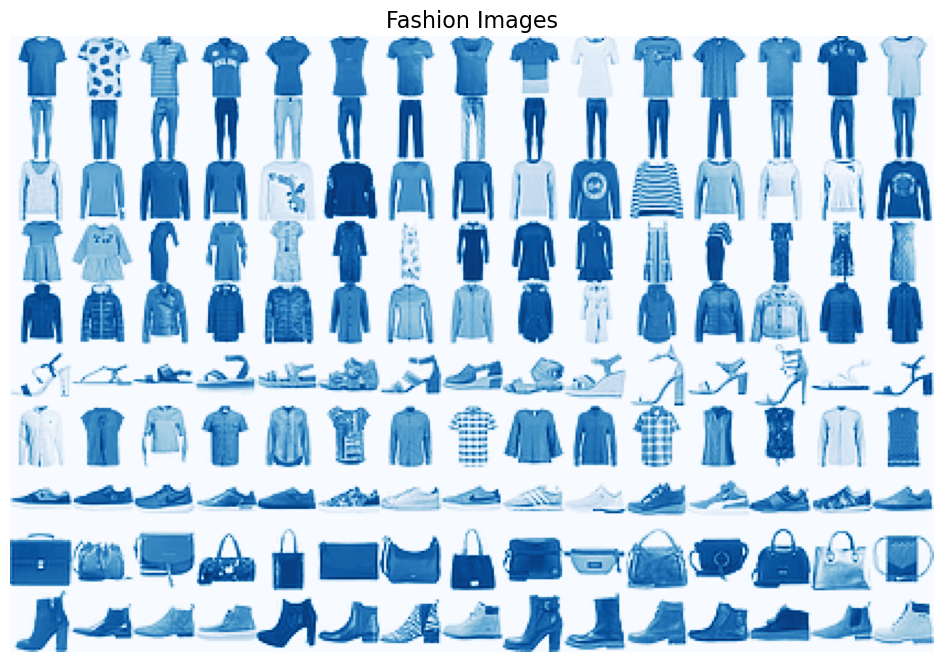

In [2]:
classes = sorted(np.unique(train_labels).astype(int))
h = w = 28
n_samples = 15

fig, ax = plt.subplots(figsize=(18, 8))
fashion_sample = np.empty(shape=(h * len(classes),
                                 w * n_samples))

for row, label in enumerate(classes):
    label_idx = np.argwhere(train_labels == label).squeeze()
    sample_indices = np.random.choice(label_idx, size=n_samples, replace=False)
    i = row * h
    for col, sample_idx in enumerate(sample_indices):
        j = col * w
        sample = train_images[sample_idx].reshape(h, w)
        fashion_sample[i:i+h, j:j + w] = sample

ax.imshow(fashion_sample, cmap='Blues')
ax.set_title('Fashion Images', fontsize=16)
plt.axis('off')

Набор данных содержит изображения различных предметов одежды: футболки, штаны, кофты, платья, обувь различного вида, etc. Всего $10$ классов. Для меньших временных затрат будем использовать только данные из тестовой части исходного набора данных (всего $10$ тысяч объектов).

In [3]:
X = test_images.reshape(len(test_images), -1)
y = test_labels

При помощи `train_test_split` разбейте набор данных на тренировочную и тестовую части в соотношении `80:20`. Используйте стратификацию по колонке отклика.

**Примечание:** здесь и далее для воспроизводимости результатов и корректного сравнения результатов экспериментов имеет смысл фиксировать `random_state`.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

Обучите модель `LogisticRegression` со следующими параметрами: `max_iter=2000, tol=0.001` на тренировочных данных. При помощи `f1_score` с параметром `average='weighted'` оцените модель на тестовых данных.

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

clf = LogisticRegression(max_iter=2000, tol=0.001, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
f1 = f1_score(y_test, y_pred, average='weighted')
print("Weighted F1-score:", f1)

Weighted F1-score: 0.7430253405684879


**Вопрос:** как работает `f1_score` и что показывает данная метрика? Опишите ее плюсы и минусы. Что означает параметр `average='weighted'`? Какие еще бывают параметры, зачем и когда они используются?

**Ваш ответ:** скор равен среднему гармоническому precision и recall для бинарной классификации. Плюсы -- учитывает обе метрики, отражает качество моделей при несбалансированных классах лучше, чем более простые метрики типа accuracy. Минусы -- игнорирует TN, может скрывать разницу между precision и recall. Из другие интересных значения параметра `average` -- `micro` агрегирует суммы TP FP FN и только потом считает (хорошо при сильном дисбалансе), `macro` усредняет по классам без взвешивания (чувсителен к редким классам), остальное все вроде для многоклассовой классификации

Добавьте к тестовым данным шум при помощи `np.random.normal(X_test, scale)`, где `scale` $\in \{50,100,150,200\}$. Визуально оцените результаты.

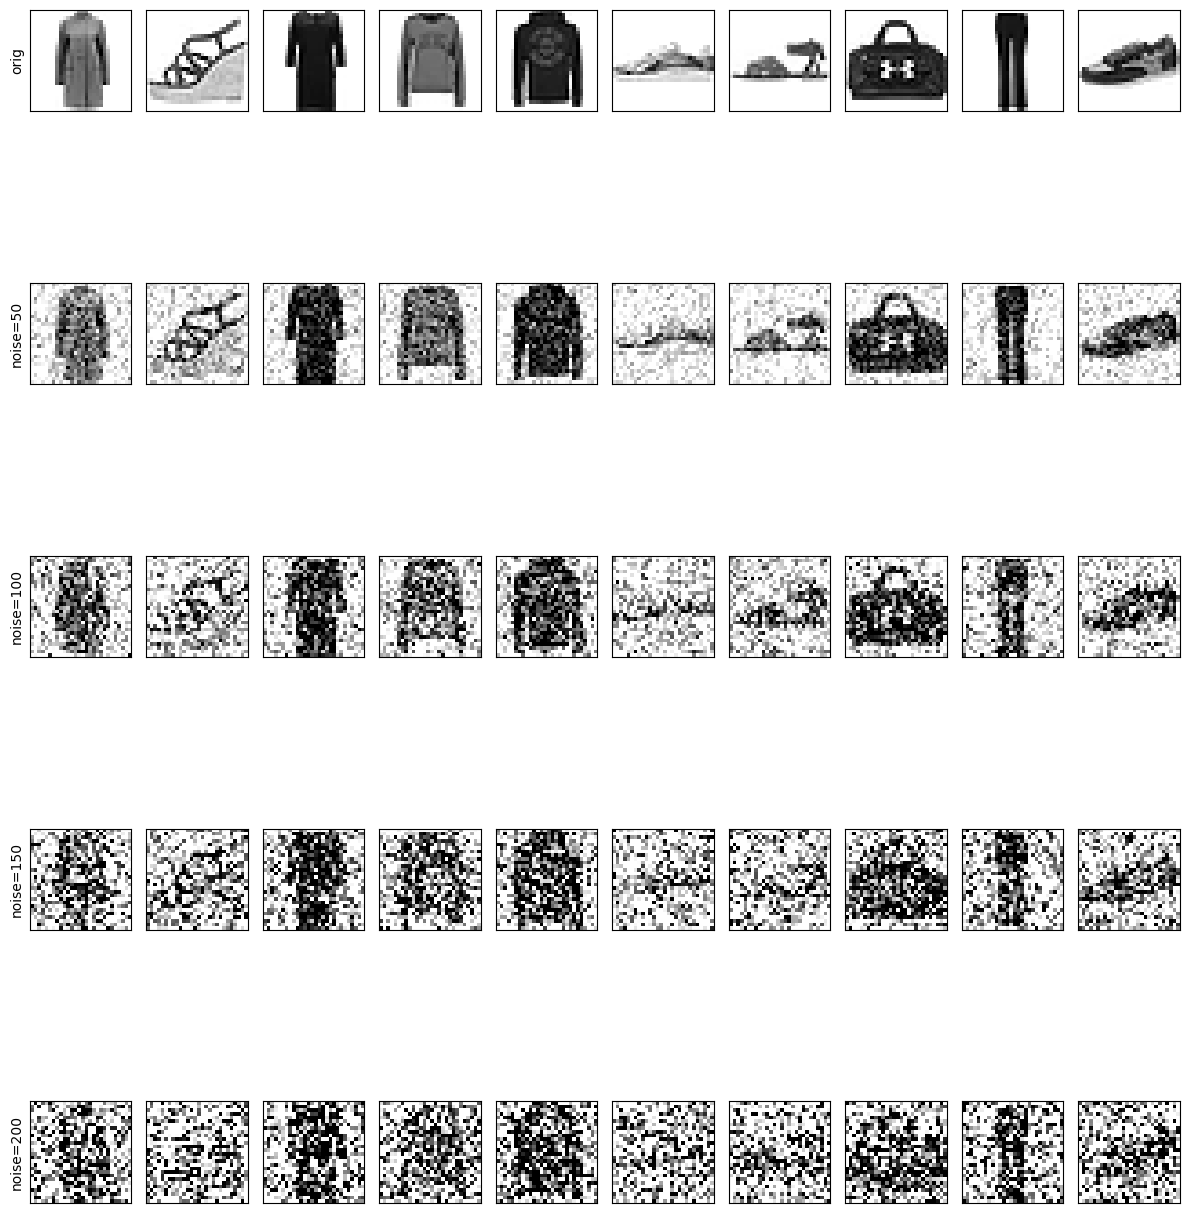

In [ ]:
scales = [50, 100, 150, 200]
np.random.seed(42)

noisy_versions = {}
for s in scales:
    Xn = np.random.normal(loc=X_test.astype(float), scale=s, size=X_test.shape)
    Xn = np.clip(Xn, 0, 255).astype(np.uint8)
    noisy_versions[s] = Xn

X_test_noisy = noisy_versions[100]

n_cols = 10
n_rows = len(scales) + 1  # original + each noise level
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), subplot_kw={'xticks': [], 'yticks': []})

for i in range(n_cols):
    axes[0, i].imshow(X_test[i].reshape(28, 28), cmap=plt.cm.gray_r)
    if i == 0:
        axes[0, i].set_ylabel('orig')

for r, s in enumerate(scales, start=1):
    for i in range(n_cols):
        axes[r, i].imshow(noisy_versions[s][i].reshape(28, 28), cmap=plt.cm.gray_r)
        if i == 0:
            axes[r, i].set_ylabel(f'noise={s}')

plt.tight_layout()
plt.show()

**Ваши выводы:** чем более широкий интервал для шума мы выбираем, тем шумнее данные. В целом все интуитивно

Произведите предсказания для зашумленных тестовых данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

In [9]:
results = {}

for s, Xn in noisy_versions.items():
    y_pred_noisy = clf.predict(Xn)
    score = f1_score(y_test, y_pred_noisy, average='weighted')
    results[s] = score
    print(f"noise={s}: Weighted F1 = {score:.4f}")

predictions_noisy = {s: clf.predict(Xn) for s, Xn in noisy_versions.items()}

noise=50: Weighted F1 = 0.5225
noise=100: Weighted F1 = 0.3258
noise=150: Weighted F1 = 0.2275
noise=200: Weighted F1 = 0.1743


**Ваши выводы:** качество моделей послу добавления шума резко ухудшилось

Попробуем избавиться от шума при помощи метода главных компонент.

Обучите модель `PCA(explained_variance)` на зашумленных тестовых данных, где `explained_variance` $\in [0.1, 0.9]$ с шагом $0.1$. Уменьшите размерность зашумленных тестовых данных, а затем при помощи `.inverse_transform()` "восстановите" данные до приближенных исходных.

In [11]:
from sklearn.decomposition import PCA


explained_vars = np.round(np.arange(0.1, 1.0, 0.1), 2)

restored = {ev: {} for ev in explained_vars}

for ev in explained_vars:
    print(f"Fitting PCA for explained_variance={ev}")
    for s, Xn in noisy_versions.items():
        Xn_float = Xn.astype(float)
        pca = PCA(n_components=ev, svd_solver='full', random_state=42)
        pca.fit(Xn_float)
        Xn_low = pca.transform(Xn_float)
        Xn_restored = pca.inverse_transform(Xn_low)
        Xn_restored = np.clip(Xn_restored, 0, 255).astype(np.uint8)
        restored[ev][s] = Xn_restored

restored_X_test_noisy = restored[0.9][100]

Fitting PCA for explained_variance=0.1
Fitting PCA for explained_variance=0.2
Fitting PCA for explained_variance=0.3
Fitting PCA for explained_variance=0.4
Fitting PCA for explained_variance=0.5
Fitting PCA for explained_variance=0.6
Fitting PCA for explained_variance=0.7
Fitting PCA for explained_variance=0.8
Fitting PCA for explained_variance=0.9


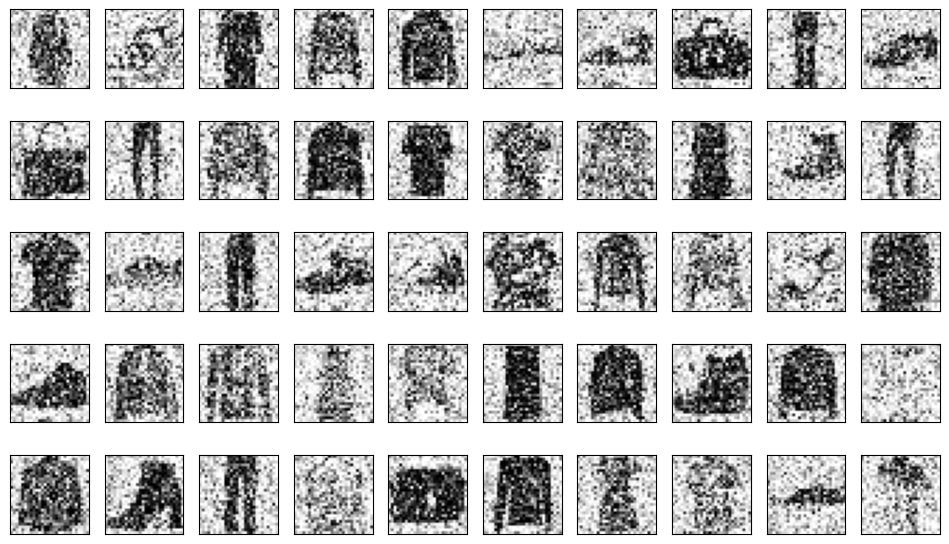

In [12]:
fig, axes = plt.subplots(5, 10, figsize=(12, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(restored_X_test_noisy[i].reshape(28, 28), cmap=plt.cm.gray_r)

**Ваши выводы:** визуально шума как будто стало меньше

Произведите предсказания для очищенных от шума данных. Оцените результат при помощи `f1_score` с параметром `average='weighted'`.

F1 (weighted) for restored data (rows: explained variance, cols: noise scale):


noise,50,100,150,200
explained_var,,,,
0.1,0.0445,0.0442,0.0885,0.2154
0.2,0.0445,0.2232,0.2669,0.1889
0.3,0.1725,0.3325,0.2514,0.1727
0.4,0.2628,0.3962,0.2605,0.1673
0.5,0.4434,0.3887,0.2543,0.1608
0.6,0.5603,0.3664,0.2436,0.1564
0.7,0.6230,0.3562,0.2274,0.1525
0.8,0.5895,0.3550,0.2242,0.1610
0.9,0.5631,0.3361,0.2262,0.1615


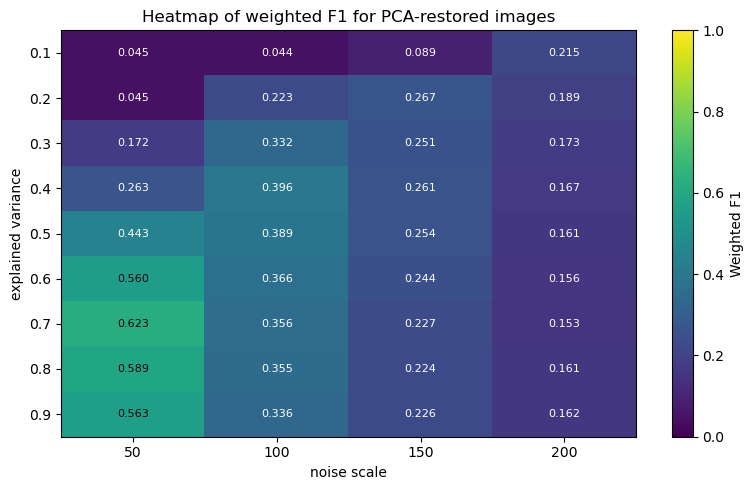

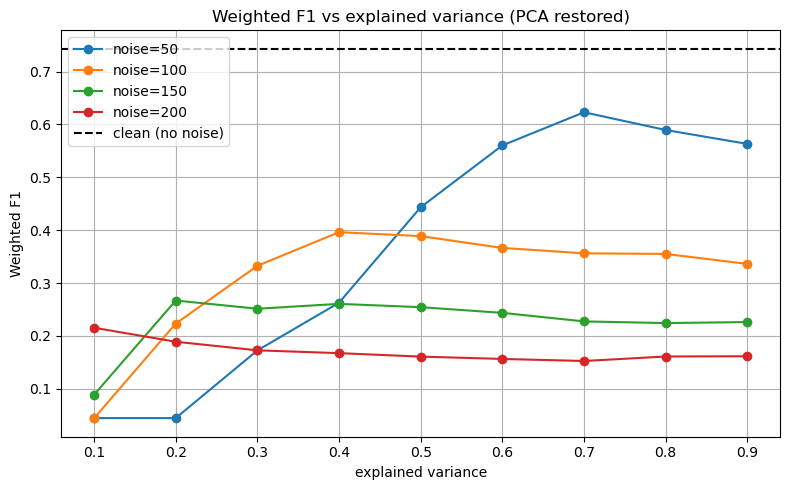

In [15]:
import pandas as pd 

scores = {}
for ev in explained_vars:
    scores[ev] = {}
    for s in scales:
        X_rest = restored[ev][s]  
        y_pred_rest = clf.predict(X_rest)
        scores[ev][s] = f1_score(y_test, y_pred_rest, average='weighted')

import matplotlib.pyplot as plt

df_scores = pd.DataFrame(scores).T  
df_scores.index.name = 'explained_var'
df_scores.columns.name = 'noise'

print("F1 (weighted) for restored data (rows: explained variance, cols: noise scale):")
display(df_scores.round(4))

plt.figure(figsize=(8, 5))
im = plt.imshow(df_scores.values, aspect='auto', cmap='viridis', vmin=0, vmax=1)
plt.colorbar(im, label='Weighted F1')
plt.xticks(ticks=np.arange(len(df_scores.columns)), labels=df_scores.columns)
plt.yticks(ticks=np.arange(len(df_scores.index)), labels=[f"{ev:.1f}" for ev in df_scores.index])
plt.xlabel('noise scale')
plt.ylabel('explained variance')
plt.title('Heatmap of weighted F1 for PCA-restored images')
for i in range(df_scores.shape[0]):
    for j in range(df_scores.shape[1]):
        plt.text(j, i, f"{df_scores.values[i, j]:.3f}", ha='center', va='center', color='white' if df_scores.values[i, j] < 0.5 else 'black', fontsize=8)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
for s in df_scores.columns:
    plt.plot(df_scores.index, df_scores[s], marker='o', label=f'noise={s}')
if 'f1' in globals():
    plt.axhline(f1, color='k', linestyle='--', label='clean (no noise)')
plt.xlabel('explained variance')
plt.ylabel('Weighted F1')
plt.title('Weighted F1 vs explained variance (PCA restored)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

best_performance = df_scores.max().max()
best_ev, best_s = None, None
for ev in df_scores.index:
    for s in df_scores.columns:
        if df_scores.loc[ev, s] == best_performance:
            best_ev, best_s = ev, s

Оцените результат при помощи `f1_score` с параметром `average='weighted'`. В качестве результата **НАГЛЯДНО** представьте получаемые значения `f1_score` в зависимости от используемого уровня шума и доли объясненной дисперции (таблицы, графики, диаграммы). Сделайте выводы.

**Ваши выводы:** 

* Лучше всего очистка от шума работает, если шума мало. Чем больше шум, тем хуже получается восстановить данные 
* Почти у каждого из уровней шума есть оптимальный подходящий уровень explained variance и он всегда ниже 1. Кроме того, чем выше уровень шума, тем обычно оптимальный уровень explained variance  ниже (кажется тут такая интуиция что чем больше данные изначально шумные тем меньше мы из них вообще сможем восстановить и в итоге главные компоненты только дополнительный шум вносят)
* Даже лучшие метрики очень далеко от бейслайна

# t-SNE

В этом блоке вам предстоит выполнить задания, касающиеся `t-SNE`.

## Теоретическая часть

Напомним, что расстояние Кульбака--Лейблера между двумя распределенями $P = \{p_1, \ldots, p_n\}$, $Q = \{q_1, \ldots, q_n\}$ вычисляется как
$$
\mathbb{KL}(P|Q) = \sum\limits_{i=1}^np_i \log \frac{p_i}{q_i}.
$$

Пусть перплексия равна $k$. Положите $p_{i|j} = 1/k$ для $k$ ближайших соседей точки $j$ за исключением $j$, $p_{j|j} = 0$, как и остальные вероятности. Положите
$$
p_{ij} = \frac{p_{i|j} + p_{j|i}}{2n}.
$$

## Задача 1

Вычислите градиент $\mathbb{KL}$ в случае использования `SNE` и `t-SNE`.

простите, я не справился (и не успел)

## Задача 2.1

В условиях предыдущей задачи самостоятельно реализуйте алгоритмы `SNE` и `t-SNE`. Проведите численные эксперименты для следующего набора данных:

In [17]:
import pandas as pd

link = 'https://courses.openedu.ru/assets/courseware/v1/6c89dd85d23926d43494d0e4dd968840/asset-v1:ITMOUniversity+INTROMLADVML+fall_2023_ITMO_mag+type@asset+block/94_16.csv'
data = pd.read_csv(link, header = None)
data.head()

,0,1,2,3,4,5,6,7,8,9
0,10.382991,-14.438544,-23.950798,-17.809813,2.480495,-15.743114,-9.112421,-27.390035,-11.955001,18.069910
1,18.987842,-13.071734,15.619164,-11.288528,-11.624820,14.845464,-4.924935,21.207876,-23.703025,4.440474
2,7.426000,-9.236580,-21.139348,6.732592,0.447684,-20.687020,-18.545136,7.758288,18.620790,-3.006755
3,10.718844,-10.240587,-20.604991,4.828083,-0.073568,-23.747055,-17.260869,7.074364,16.996747,-6.796469
4,10.662165,3.871777,12.384108,-1.921321,-1.990254,-5.469310,2.801321,-19.978717,23.414766,-2.654889


**НАГЛЯДНО** представьте получаемые результаты (визуализации, время работы, анимация, etc) в зависимости от используемого метода (`SNE`/`t-SNE`) и значения перплексии. Сделайте выводы.

**Замечание:** В качестве способа минимизации функции потерь можно использовать либо самостоятельно реализованный градиентный спуск, либо некоторую библиотечную оптимизацию, использующую вычисленные вами в предыдущей задаче градиенты функций потерь. Например, на основе `scipy.optimize.minimize`.

Для реализации я немного подглядел код у @yegorchk, но потом сам осмыслил и собрал в классы

In [ ]:
# @title Пример использования scipy.optimize.minimize
from scipy.optimize import minimize

# Пусть минимизируемая функция имеет вид $(x-2)^2 + (y+1)^2$
# Начальная точка
x0 = np.array([5,8])

# Для вычисления точки минимума в функцию minimize подается
# cама минимизируемая функция и ее градиент
def f_and_grad(point):
  x,y = point
  f = (x-2)**2 + (y+1)**2
  grad = np.array([2*(x-2), 2*(y+1)])
  return f, grad


# Чтобы функция minimize использовала именно наш градиент
# устанавливаем соответствующий параметр jac=True
minimize(f_and_grad, x0, jac=True)

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 3.0814879110195774e-29
        x: [ 2.000e+00 -1.000e+00]
      nit: 4
      jac: [ 1.066e-14 -3.109e-15]
 hess_inv: [[ 9.500e-01 -1.500e-01]
            [-1.500e-01  5.500e-01]]
     nfev: 5
     njev: 5

In [27]:
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
import time

In [28]:
# базовые функции

def pairwise_dist_sq(Y):
    """Матрица квадратов расстояний """
    sum_Y = np.sum(Y**2, axis=1, keepdims=True)
    D = sum_Y + sum_Y.T - 2 * Y @ Y.T
    np.fill_diagonal(D, 0.0)
    return D

def make_P_cond_kNN(X, k):
    """Матрица условных вероятностей через k ближайших соседей."""
    n = X.shape[0]
    nn = NearestNeighbors(n_neighbors=k+1, metric="euclidean").fit(X)
    distances, indices = nn.kneighbors(X)
    P_cond = np.zeros((n, n))
    for i in range(n):
        neigh = indices[i, 1:]        # кроме самой точки
        P_cond[i, neigh] = 1.0 / k
    return P_cond

def symmetrize_P(P_cond):
    """Строим симметричное p_{ij} из p_{j|i} по формуле"""
    n = P_cond.shape[0]
    P = (P_cond + P_cond.T) / (2.0 * n)
    np.fill_diagonal(P, 0.0)
    P = P / P.sum()
    return P

In [30]:
class SNE:
    def __init__(self, k=30, sigma=1.0, maxiter=300, random_state=0):
        self.k = k
        self.sigma = sigma
        self.maxiter = maxiter
        self.random_state = random_state
        self.embedding_ = None
        self.P_cond_ = None

    def _cost_grad(self, Y_flat):
        """Возвращает значение функционала SNE и градиент"""
        n = self.P_cond_.shape[0]
        Y = Y_flat.reshape(n, 2)
        D = pairwise_dist_sq(Y)

        # условные q
        Q_num = np.exp(-D / (2 * self.sigma**2))
        np.fill_diagonal(Q_num, 0.0)
        Q_den = Q_num.sum(axis=1, keepdims=True) + 1e-12
        Q_cond = Q_num / Q_den

        # C 
        mask = self.P_cond_ > 0
        C = np.sum(self.P_cond_[mask] * (np.log(self.P_cond_[mask]) - np.log(Q_cond[mask] + 1e-12)))

        # градиент
        term = self.P_cond_ - Q_cond + (self.P_cond_ - Q_cond).T
        grad = 2.0 * ((term[..., None]) * (Y[:, None, :] - Y[None, :, :])).sum(axis=1)
        return C, grad.ravel()

    def fit(self, X):
        np.random.seed(self.random_state)
        n = X.shape[0]
        self.P_cond_ = make_P_cond_kNN(X, self.k)
        Y0 = 1e-4 * np.random.randn(n, 2)
        res = minimize(
            lambda y: self._cost_grad(y),
            Y0.ravel(),
            jac=True,
            method="L-BFGS-B",
            options={"maxiter": self.maxiter, "disp": True}
        )
        self.embedding_ = res.x.reshape(n, 2)
        return self

In [31]:
class TSNECustom:
    def __init__(self, k=30, maxiter=500, random_state=0):
        self.k = k
        self.maxiter = maxiter
        self.random_state = random_state
        self.embedding_ = None
        self.P_ = None

    def _cost_grad(self, Y_flat):
        """Возвращает значение функционала t-SNE и градиент по Y"""
        n = self.P_.shape[0]
        Y = Y_flat.reshape(n, 2)
        D = pairwise_dist_sq(Y)

        num = 1.0 / (1.0 + D)
        np.fill_diagonal(num, 0.0)
        Q = num / num.sum()
        Q = np.maximum(Q, 1e-12)

        # C
        mask = self.P_ > 0
        C = np.sum(self.P_[mask] * (np.log(self.P_[mask]) - np.log(Q[mask])))

        # градиент
        PQ = (self.P_ - Q)
        grad = 4.0 * ((PQ * num)[..., None] * (Y[:, None, :] - Y[None, :, :])).sum(axis=1)
        return C, grad.ravel()

    def fit(self, X):
        np.random.seed(self.random_state)
        n = X.shape[0]
        P_cond = make_P_cond_kNN(X, self.k)
        self.P_ = symmetrize_P(P_cond)
        Y0 = 1e-4 * np.random.randn(n, 2)
        res = minimize(
            lambda y: self._cost_grad(y),
            Y0.ravel(),
            jac=True,
            method="L-BFGS-B",
            options={"maxiter": self.maxiter, "disp": True}
        )
        self.embedding_ = res.x.reshape(n, 2)
        return self


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =          120     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.48086D+02    |proj g|=  6.05579D-04

At iterate    1    f=  1.37965D+02    |proj g|=  9.75494D+00

At iterate    2    f=  1.37963D+02    |proj g|=  9.66756D+00

At iterate    3    f=  1.02727D+02    |proj g|=  7.69655D+00

At iterate    4    f=  8.41939D+01    |proj g|=  5.19802D+00

At iterate    5    f=  5.56726D+01    |proj g|=  8.33269D+00

At iterate    6    f=  4.51690D+01    |proj g|=  2.80326D+00

At iterate    7    f=  3.99283D+01    |proj g|=  1.40523D+00

At iterate    8    f=  3.34038D+01    |proj g|=  2.01099D+00

At iterate    9    f=  2.85852D+01    |proj g|=  1.27973D+00

At iterate   10    f=  2.60634D+01    |proj g|=  8.35343D-01

At iterate   11    f=  2.44925D+01    |proj g|=  7.42327D-01

At iterate   12    f=  2.38874D+01    |proj g|=  5.04222D-01

At iterate   13    f=  2.3

 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.
 This problem is unconstrained.


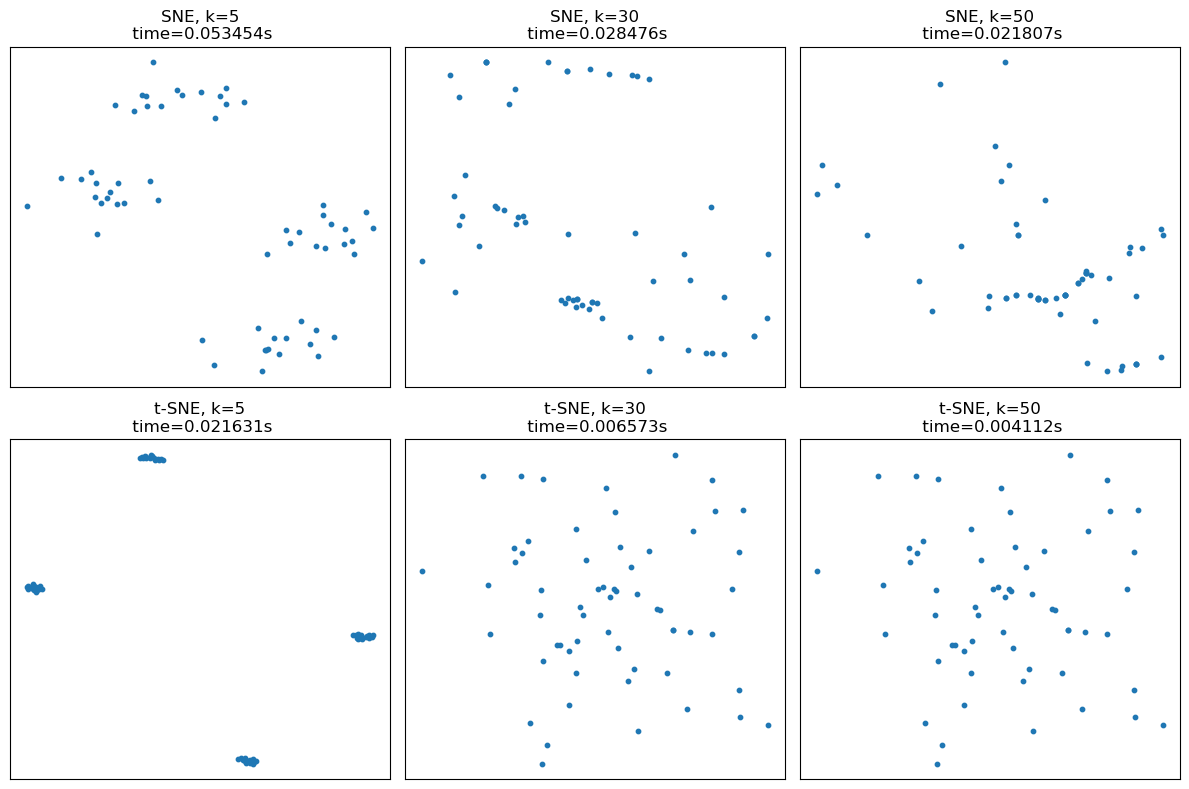

In [33]:
ks = [5, 30, 50]
fig, axes = plt.subplots(2, len(ks), figsize=(4*len(ks), 8))

for j, k in enumerate(ks):
    t0 = time.time()
    sne = SNE(k=k, sigma=1.0, maxiter=200, random_state=0).fit(X)
    t1 = time.time()
    axes[0, j].scatter(sne.embedding_[:, 0], sne.embedding_[:, 1], s=10)
    axes[0, j].set_title(f"SNE, k={k}\n time={t1-t0:.6f}s")

    t0 = time.time()
    tsne = TSNECustom(k=k, maxiter=500, random_state=0).fit(X)
    t1 = time.time()
    axes[1, j].scatter(tsne.embedding_[:, 0], tsne.embedding_[:, 1], s=10)
    axes[1, j].set_title(f"t-SNE, k={k}\n time={t1-t0:.6f}s")

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


Выводы: 

1. SNE:
    * При всех SNE выдаёт похожую форму 
    * Кластеры значительно хуже разделимы  при k > 5
2. t-SNE:
    * при k = 5 очень агрессивно выявляет структуру, кластеры слипаются 
    * при более высоком k кластеры вообще визуально не разделимы
3. t-SNE в реализации работает быстрее, чем SNE, возможно, из-за
    * симметричной формулы
    * t ядро проще нормировать, чем условные распределения в SNE

## Задача 2.2

Используя набор данных из Задачи 2.1 и [библиотечную реализацию t-SNE](https://opentsne.readthedocs.io/en/latest/api/sklearn.html), произведите численные эксперименты. Обратите особое внимание на следующие параметры: `perplexity, early_exaggeration, exaggeration, initialization, dof`. Сравните время работы и получаемые результаты с результатами Задачи 2.1. Сделайте выводы.

In [34]:
pip install openTSNE

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 977.2/977.2 kB 4.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [35]:
from openTSNE.sklearn import TSNE
def run_opentsne(
    X,
    perplexity=30,
    early_exaggeration=12,
    exaggeration=None,
    initialization="pca",
    dof=1,
    n_iter=500,
    random_state=0,
):
    """
    Запускает openTSNE.sklearn.TSNE с заданными параметрами
    и возвращает (Y, elapsed_time).
    """
    tsne = TSNE(
        n_components=2,
        perplexity=perplexity,
        early_exaggeration=early_exaggeration,
        exaggeration=exaggeration,
        initialization=initialization,
        dof=dof,
        n_iter=n_iter,
        random_state=random_state,
        verbose=False,
    )
    t0 = time.time()
    Y = tsne.fit_transform(X)
    t1 = time.time()
    return Y, t1 - t0


Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 50 is too high. Using perplexity 19.67 instead


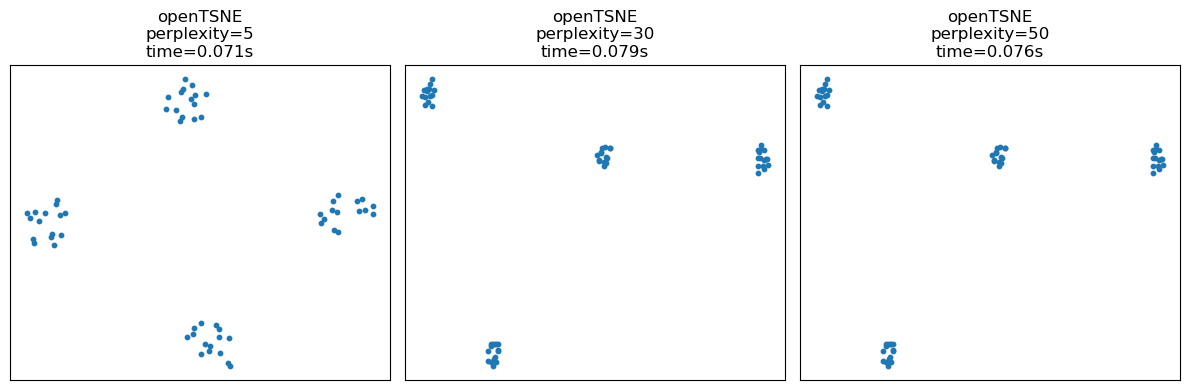

In [36]:
perps = [5, 30, 50]

fig, axes = plt.subplots(1, len(perps), figsize=(4*len(perps), 4))

for j, perp in enumerate(perps):
    Y, dt = run_opentsne(X, perplexity=perp)
    ax = axes[j]
    ax.scatter(Y[:, 0], Y[:, 1], s=10)
    ax.set_title(f"openTSNE\nperplexity={perp}\ntime={dt:.3f}s")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


При слишкой высокой перплексии классы слишком жестко выделяются при прочих равных. 

Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead


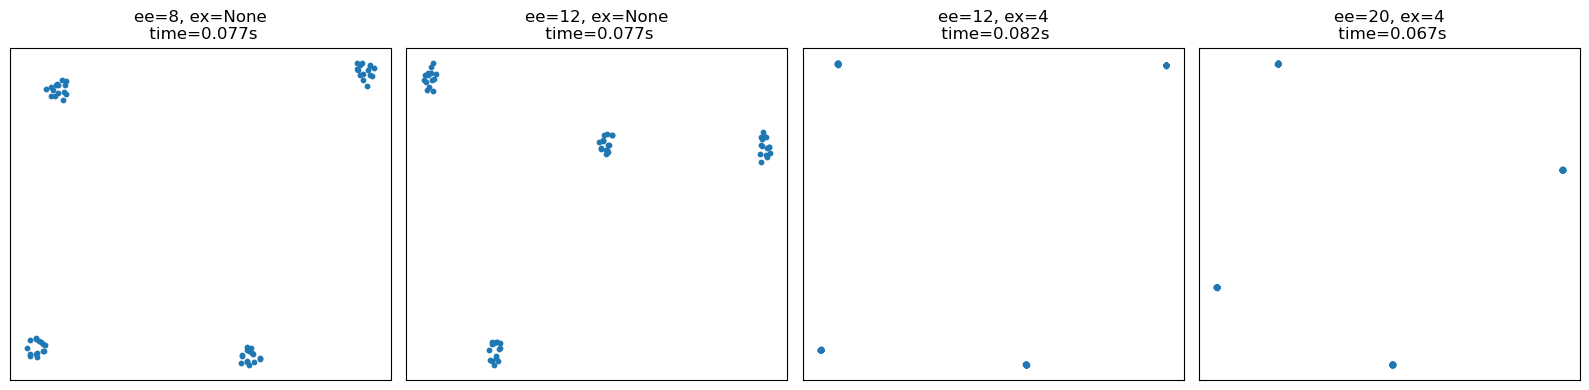

In [37]:
settings_exagg = [
    (8, None),
    (12, None),
    (12, 4),
    (20, 4),
]

fig, axes = plt.subplots(1, len(settings_exagg), figsize=(4*len(settings_exagg), 4))

for j, (ee, ex) in enumerate(settings_exagg):
    Y, dt = run_opentsne(
        X,
        perplexity=30,
        early_exaggeration=ee,
        exaggeration=ex,
    )
    ax = axes[j]
    title = f"ee={ee}, ex={ex}\n time={dt:.3f}s"
    ax.scatter(Y[:, 0], Y[:, 1], s=10)
    ax.set_title(title)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


И снова, при росте ee и ex кластеры выделяются все более компактно 

Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead


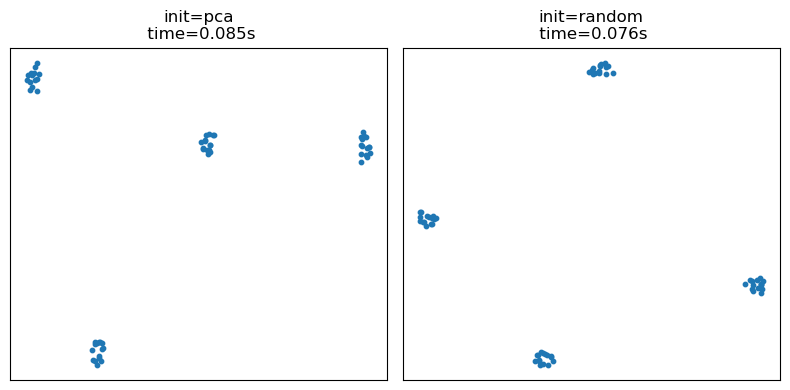

In [38]:
inits = ["pca", "random"]

fig, axes = plt.subplots(1, len(inits), figsize=(4*len(inits), 4))

for j, init in enumerate(inits):
    Y, dt = run_opentsne(
        X,
        perplexity=30,
        early_exaggeration=12,
        initialization=init,
    )
    ax = axes[j]
    ax.scatter(Y[:, 0], Y[:, 1], s=10)
    ax.set_title(f"init={init}\n time={dt:.3f}s")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


Структура выделяется примерно одинаково по качеству, но в общем случае PCA должен давать более стабильный результат

Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead
Perplexity value 30 is too high. Using perplexity 19.67 instead


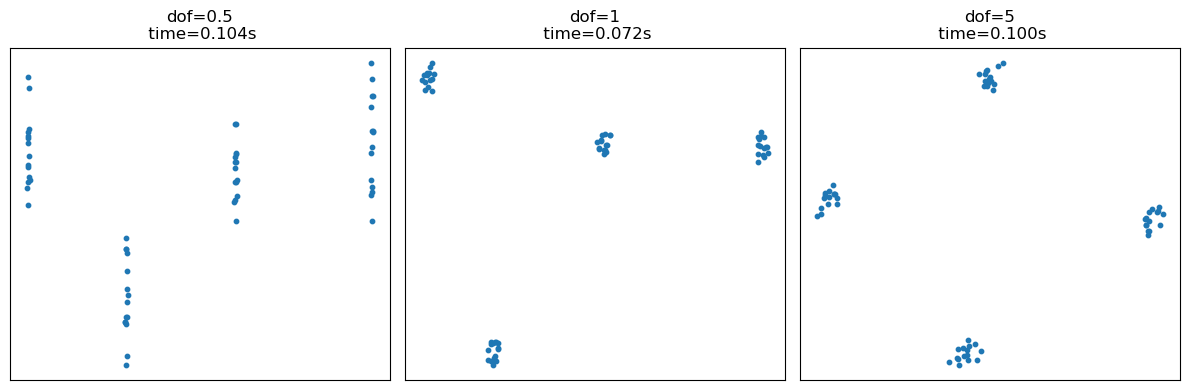

In [39]:
dofs = [0.5, 1, 5]

fig, axes = plt.subplots(1, len(dofs), figsize=(4*len(dofs), 4))

for j, d in enumerate(dofs):
    Y, dt = run_opentsne(
        X,
        perplexity=30,
        dof=d,
    )
    ax = axes[j]
    ax.scatter(Y[:, 0], Y[:, 1], s=10)
    ax.set_title(f"dof={d}\n time={dt:.3f}s")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()


Чем ближе к нормальному распределению тем более гладко выделяются классы, чем тяжелее хвосты - тем жестче. 

Моя реализация выглядит чуть быстрее, но боюсь что это визуальный шум, на самом деле open tSNE написан на CPython и будет работать на больших данных кратно быстрее

## Задача 3

Проверьте свои выводы о влиянии рассмотренных в Задаче 2.2 параметров на результат, используя более объемный, как с точки зрения количества объектов, так и с точки зрения количества признаков, датасет на свой выбор.

In [46]:
from sklearn.datasets import fetch_openml

X_big, y_big = fetch_openml("isolet", version=1, return_X_y=True, as_frame=False)

In [47]:
def run_tsne_param(X, **kwargs):
    tsne = TSNE(n_components=2, **kwargs)
    t0 = time.time()
    Y = tsne.fit_transform(X)
    dt = time.time() - t0
    return Y, dt

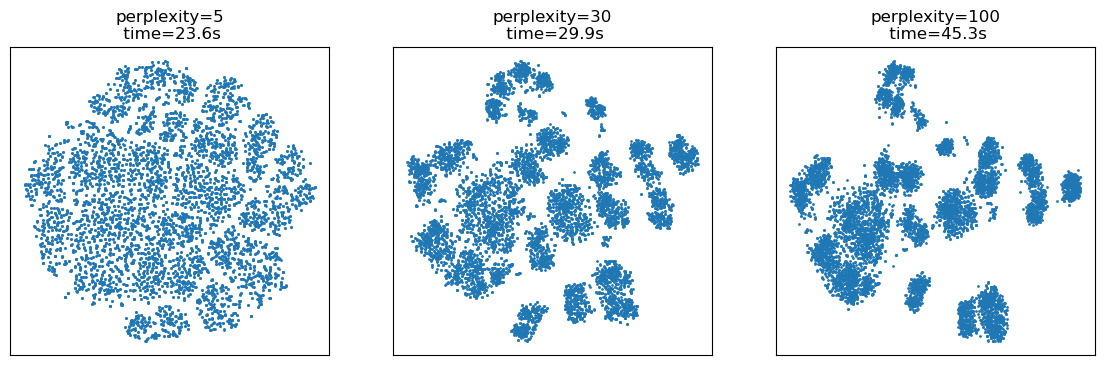

In [48]:
perps = [5, 30, 100]

fig, ax = plt.subplots(1, len(perps), figsize=(14, 4))
for i, p in enumerate(perps):
    Y, dt = run_tsne_param(X_big, perplexity=p, random_state=0)
    ax[i].scatter(Y[:,0], Y[:,1], s=1)
    ax[i].set_title(f"perplexity={p}\n time={dt:.1f}s")
    ax[i].set_xticks([]); ax[i].set_yticks([])
plt.show()


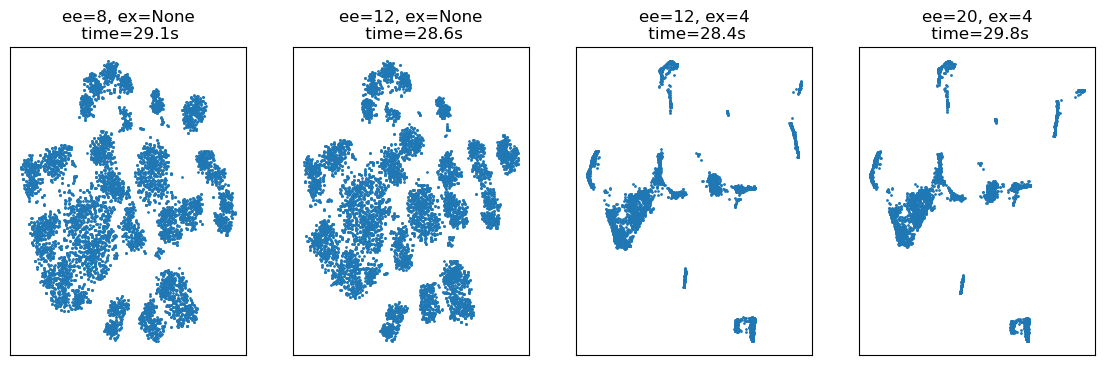

In [52]:
settings = [(8, None), (12, None), (12,4), (20,4)]

fig, ax = plt.subplots(1, len(settings), figsize=(14,4))
for i, (ee, ex) in enumerate(settings):
    Y, dt = run_tsne_param(X_big,
                           perplexity=30,
                           early_exaggeration=ee,
                           exaggeration=ex,
                           random_state=0)
    ax[i].scatter(Y[:,0], Y[:,1], s=1)
    ax[i].set_title(f"ee={ee}, ex={ex}\n time={dt:.1f}s")
    ax[i].set_xticks([]); ax[i].set_yticks([])
plt.show()


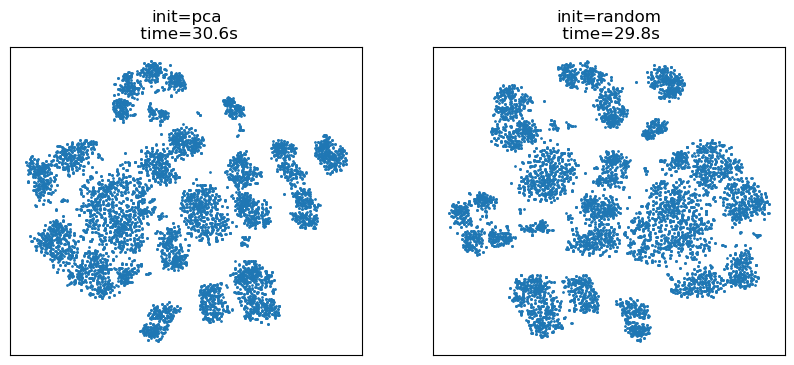

In [50]:
inits = ["pca", "random"]

fig, ax = plt.subplots(1,2, figsize=(10,4))
for i, init in enumerate(inits):
    Y, dt = run_tsne_param(X_big, perplexity=30, initialization=init, random_state=0)
    ax[i].scatter(Y[:,0], Y[:,1], s=1)
    ax[i].set_title(f"init={init}\n time={dt:.1f}s")
    ax[i].set_xticks([]); ax[i].set_yticks([])
plt.show()


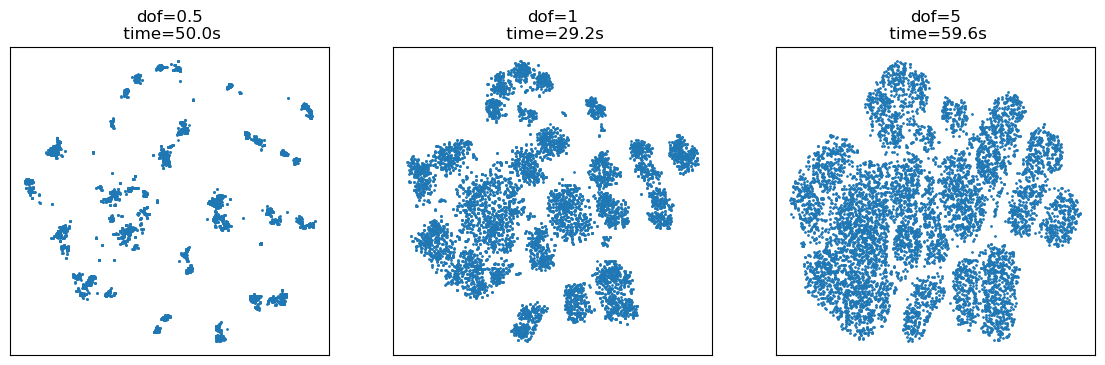

In [51]:
dofs = [0.5, 1, 5]
fig, ax = plt.subplots(1, len(dofs), figsize=(14,4))

for i, d in enumerate(dofs):
    Y, dt = run_tsne_param(X_big, perplexity=30, dof=d, random_state=0)
    ax[i].scatter(Y[:,0], Y[:,1], s=1)
    ax[i].set_title(f"dof={d}\n time={dt:.1f}s")
    ax[i].set_xticks([]); ax[i].set_yticks([])
plt.show()


В целом предыдущие выводы можно повторить: 
* при росте перплексии, ee, ex кластеры сжимаются более компактно 
* pca выглядит стабильнее
* чем больше мы приближаем распределение к нормальному тем более гладкой выходит структура, чем тяжелее делаем хвосты -- тем компактнее